In [11]:
# objective: to classify the iris flowers into all three classes
from sklearn import datasets
import numpy as np
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

iris = datasets.load_iris()
list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']

In [7]:
X = iris["data"][:, (2,3)] # petal length, petal width
y = iris["target"]

# swtich to Softmax Regression, specify a solver that supports Softmax Regression
softmax_reg = LogisticRegression(multi_class="multinomial", solver = "lbfgs", C=10)
softmax_reg.fit(X,y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [8]:
# If find an iris with 5cm long and 2cm wide petals, ask the model what type of iris it is
softmax_reg.predict([[5,2]])
# class 2 = Iris-Virginica

array([2])

In [13]:
softmax_reg.predict_proba([[5,2]])
# The given input is Iris-Virginica (class 2) with 94.2 % probability or Iris-Versicolor with 5.8% probability

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])

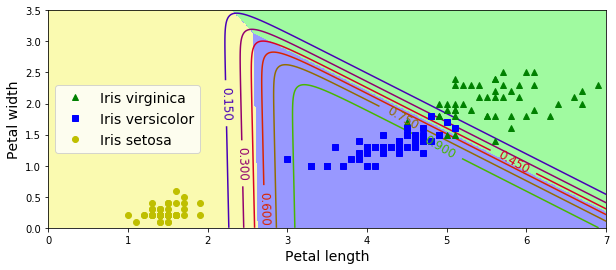

In [14]:
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]


y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
plt.show()